In [131]:
import pandas as pd
df=pd.read_csv("influencer.csv")
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


# Data Pre-processing


In [132]:
# finding the null values
df.isna().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [133]:
df["Country Or Region"].value_counts()

Country Or Region
United States             65
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: count, dtype: int64

In [134]:
# replacing nan values
df["Country Or Region"].fillna("United States",inplace=True)

In [135]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [136]:
# changing the datatypes
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'b' in x:
        return float(x.replace('b', '')) * 1000000000
    return 0.0
df['Followers'] = df['Followers'].apply(value_to_float)
df['Avg. Likes'] = df['Avg. Likes'].apply(value_to_float)
df['New Post Avg. Likes'] = df['New Post Avg. Likes'].apply(value_to_float)
df['Total Likes'] = df['Total Likes'].apply(value_to_float)

In [137]:
df['Posts'] = df['Posts'].str.replace('k', '').astype(float) * 1000

# Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [138]:
# finding the corelation coefficient
df.corr(numeric_only=True)

# 0 : no linearrealtionship
# close to 1 : very strong linear relationship
# close to -1 : very strong -ve linear relationship

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,0.041473,0.028900,-0.272323,-0.465119
Influence Score,-0.354843,1.000000,0.365428,0.048502,-0.101800,-0.072460,0.040011,0.234987
Followers,-0.698193,0.365428,1.000000,0.346829,-0.016959,-0.107439,0.260764,0.667546
Avg. Likes,-0.277699,0.048502,0.346829,1.000000,0.169767,0.789359,0.892784,0.361296
Posts,0.041473,-0.101800,-0.016959,0.169767,1.000000,0.152780,0.166123,-0.169960
60-Day Eng Rate,0.028900,-0.072460,-0.107439,0.789359,0.152780,1.000000,0.866293,-0.001560
New Post Avg. Likes,-0.272323,0.040011,0.260764,0.892784,0.166123,0.866293,1.000000,0.351335
Total Likes,-0.465119,0.234987,0.667546,0.361296,-0.169960,-0.001560,0.351335,1.000000


<Axes: >

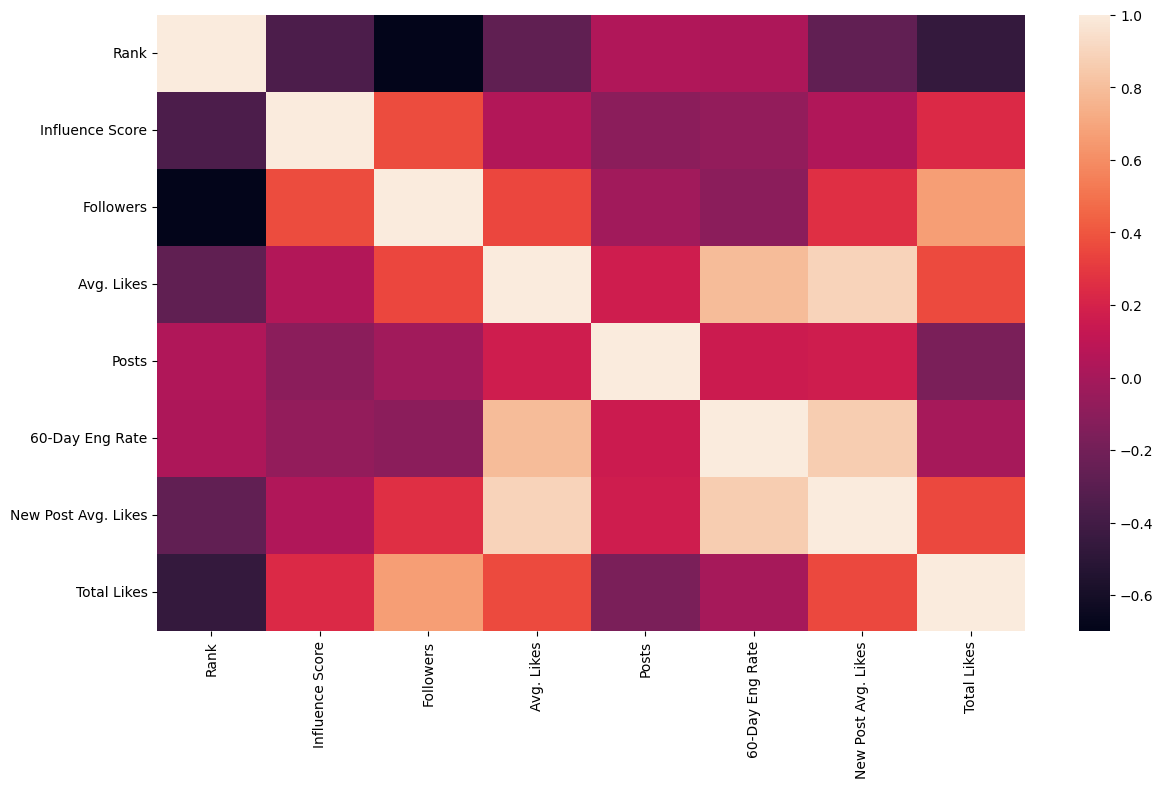

In [139]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True))

# What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts

C:\Users\goutham\AppData\Local\Temp\ipykernel_9952\56430026.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


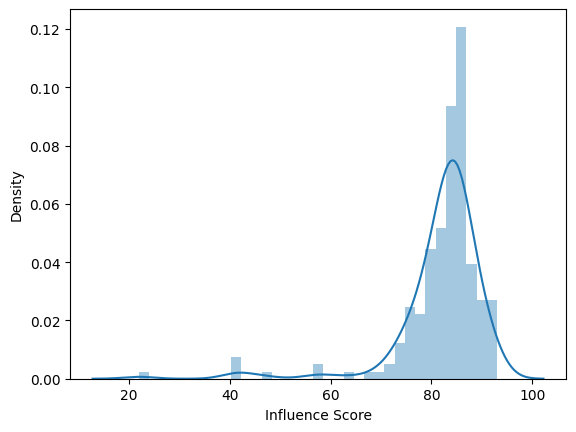

C:\Users\goutham\AppData\Local\Temp\ipykernel_9952\56430026.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


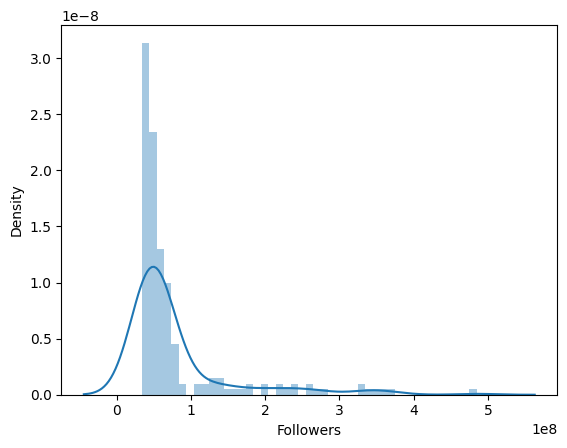

C:\Users\goutham\AppData\Local\Temp\ipykernel_9952\56430026.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z)


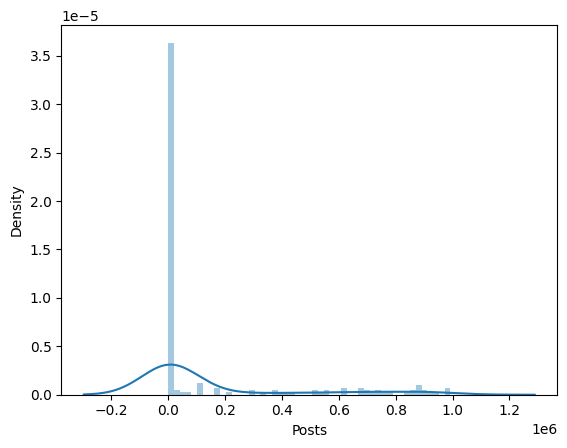

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
x=df["Influence Score"]
y=df["Followers"]
z=df["Posts"]
sns.distplot(x)
plt.show()

sns.distplot(y)
plt.show()

sns.distplot(z)
plt.show()


# Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

In [141]:
c=df["Country Or Region"].value_counts().iloc[0:1]
print(c)


Country Or Region
United States    128
Name: count, dtype: int64


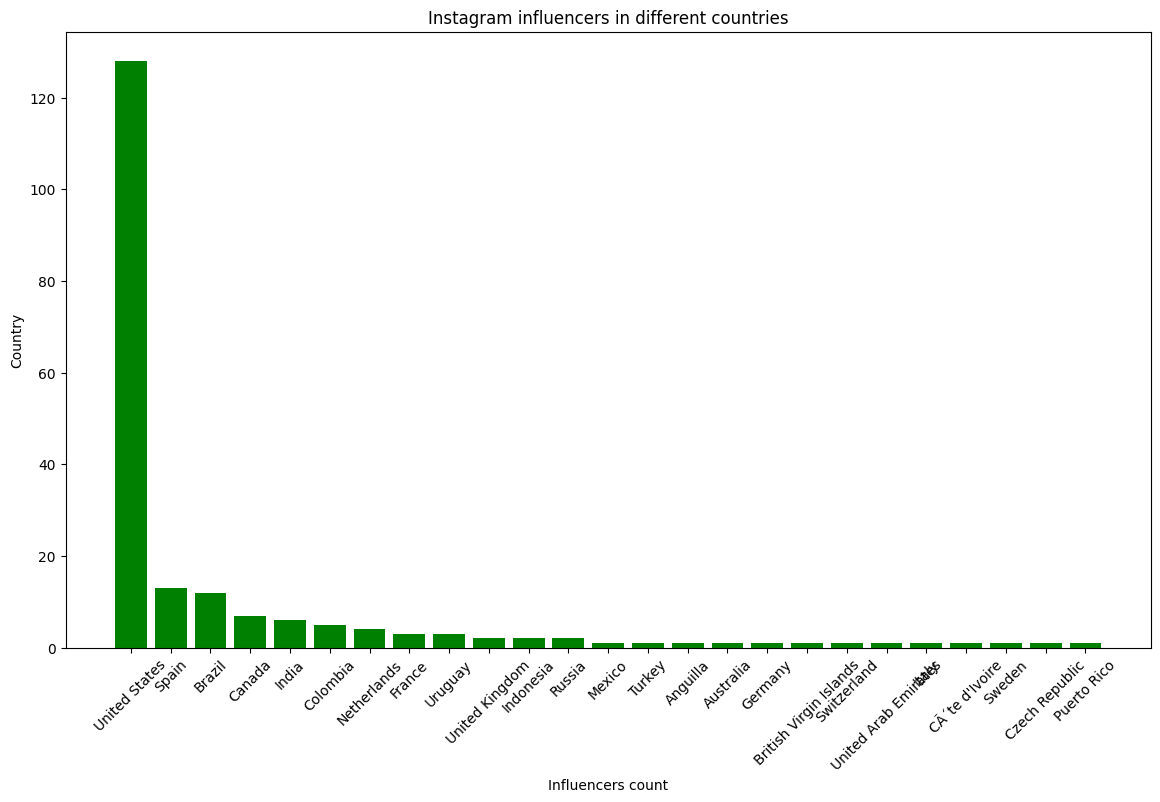

In [183]:
y=df["Country Or Region"].value_counts()
x=df["Country Or Region"].unique()
plt.figure(figsize=(14,8))
plt.bar(x,y,color="green",width=0.8)
plt.xlabel("Influencers count")
plt.ylabel("Country")
plt.title("Instagram influencers in different countries")
plt.xticks(rotation=45)


plt.show()

In [100]:

df.sort_values("Followers",axis=0,ascending =False,inplace=True)

# Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes

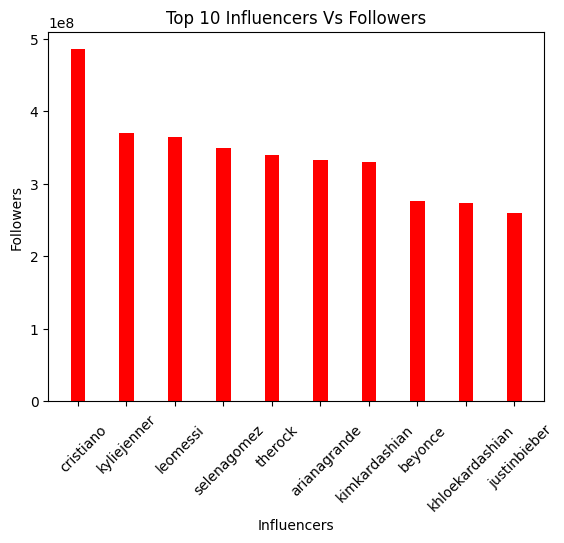

In [153]:
df.sort_values("Followers",axis=0,ascending =False,inplace=True)
x=df["Channel Info"].iloc[0:10]
y=df["Followers"].iloc[0:10]
plt.bar(x,y,color="red",width=0.3)
plt.xlabel("Influencers")
plt.ylabel("Followers")
plt.title("Top 10 Influencers Vs Followers")
plt.xticks(rotation=45)

plt.show()

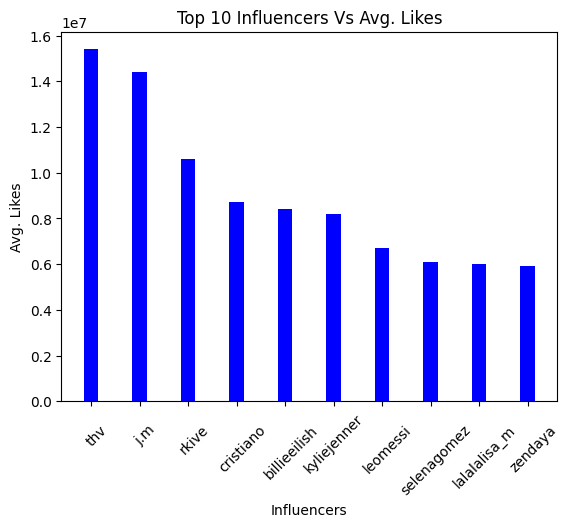

In [154]:
df.sort_values("Avg. Likes",axis=0,ascending =False,inplace=True)
x=df["Channel Info"].iloc[0:10]
y=df["Avg. Likes"].iloc[0:10]
plt.bar(x,y,color="blue",width=0.3)
plt.xlabel("Influencers")
plt.ylabel("Avg. Likes")
plt.title("Top 10 Influencers Vs Avg. Likes")
plt.xticks(rotation=45)

plt.show()

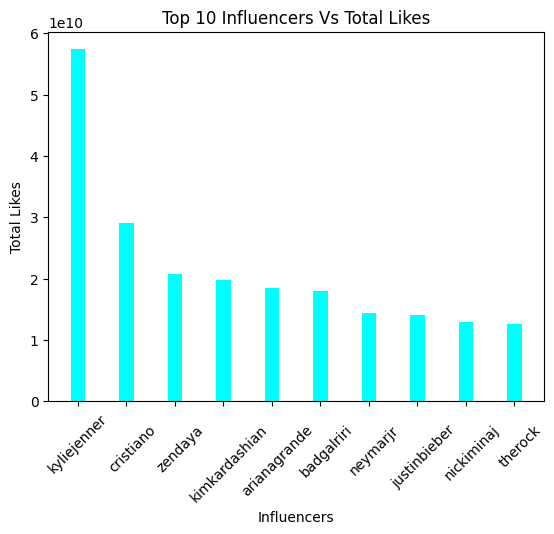

In [155]:
df.sort_values("Total Likes",axis=0,ascending =False,inplace=True)
x=df["Channel Info"].iloc[0:10]
y=df["Total Likes"].iloc[0:10]
plt.bar(x,y,color="cyan",width=0.3)
plt.xlabel("Influencers")
plt.ylabel("Total Likes")
plt.title("Top 10 Influencers Vs Total Likes")
plt.xticks(rotation=45)
plt.show()

# Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Score
● Posts and Average likes
● Posts and Influence Score

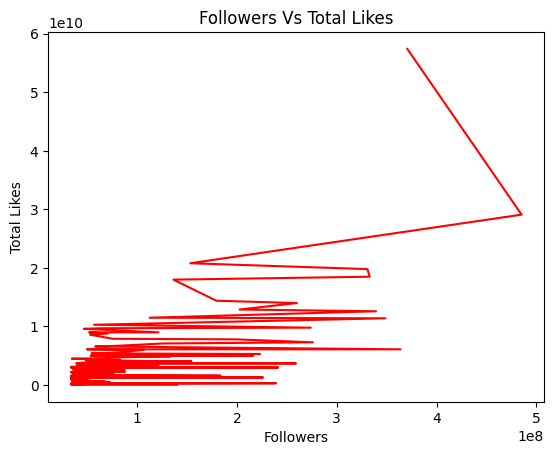

In [161]:
x=df["Followers"]
y=df["Total Likes"]
plt.plot(x,y,color="r")
plt.xlabel("Followers")
plt.ylabel("Total Likes")
plt.title("Followers Vs Total Likes")
plt.show()

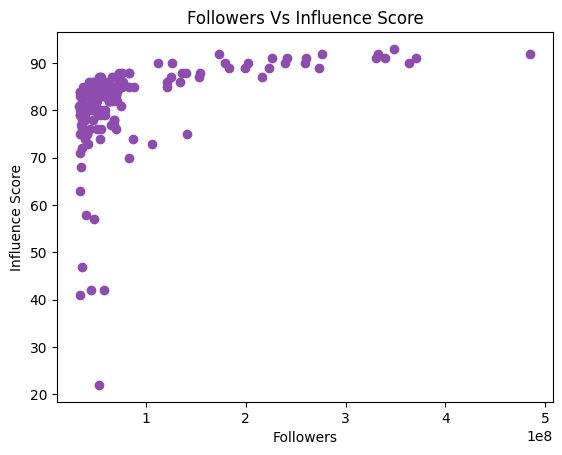

In [165]:
x=df["Followers"]
y=df["Influence Score"]
plt.scatter(x,y,color="#8e4caf")
plt.xlabel("Followers")
plt.ylabel("Influence Score")
plt.title("Followers Vs Influence Score")
plt.show()

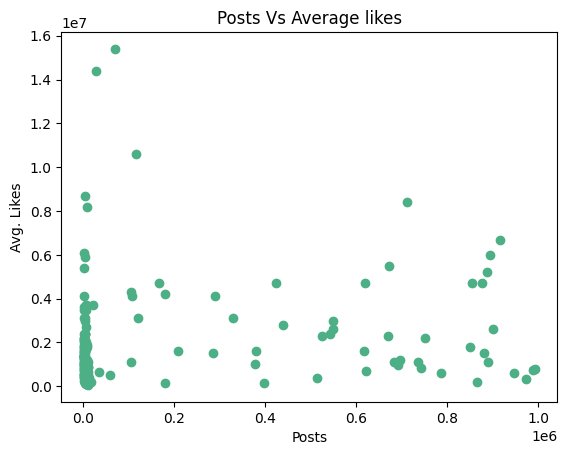

In [184]:
import numpy as np
x=df["Posts"]
y=df["Avg. Likes"]
plt.scatter(x,y,color="#4caf86")
plt.xlabel("Posts")
plt.ylabel("Avg. Likes")
plt.title("Posts Vs Average likes")
plt.show()

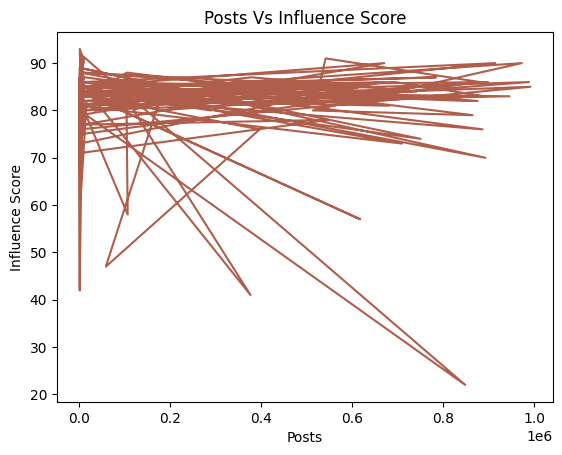

In [187]:
x=df["Posts"]
y=df["Influence Score"]
plt.plot(x,y,color="#af5e4c")
plt.xlabel("Posts")
plt.ylabel("Influence Score")
plt.title("Posts Vs Influence Score")
plt.show()